# DS 3000 HW 5

Due: Tue Mar 16 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to gradescope.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run "Kernel > Restart & Run All" just before uploading the `ipynb` file to gradescope.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or post a piazza note if you have a specific question about your work you'd like another pair of eyes to talk through.  (Remember, mark your piazza note private if it contains anything which may be considered a solution to the exercise).

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment.  For example, a python trick I find particularly clever (and useful, sometimes):

```python
from collections import defaultdict

def tree(): 
    # https://gist.github.com/hrldcpr/2012250
    return defaultdict(tree)
```

You need not cite the official python documentation or the documentation of any python library which is imported in the template (e.g. matplotlib, numpy, scipy).

**Documentation / style counts for credit**  Please see our course's python style guide, available on canvas, for further information.

## Part 1 (10 points)

By examining the correlation matrix given below, offer a description of the passenger most likely to survive the titanic disaster.  Your description should be easily understood by non-technical readers.  One example recipe might be:

To survive the Titanic, the ideal passenger should ...
1. not be alone
1. have as many siblings and parents aboard as possible
1. pay a low fare

- Be sure to order your description from the most to least important feature
    - According to the example above ...
        - its most important to not be alone
        - the next most import feature is to have as many siblings / parents
        - the next most import feature is to pay a low fare ...
- Be sure to include all other features in the dataset which are not `survived`.

A dataset dictionary is given below.


| Feature    | Description                                               |
|------------|-----------------------------------------------------------|
| survived   | 1 if passenger survived, 0 otherwise                      |
| pclass     | passenger class (1=first, 2=second, …)                    |
| age        | age in years                                              |
| sibsp      | total siblings & spouses aboard (not including passenger) |
| parch      | total parents & children aboard (not including passenger) |
| fare       | price paid for ticket                                     |
| adult_male | 1 if passenger is male, 0 otherwise                       |
| alone      | 1 if passenger traveling alone, 0 otherwise               |

If you'd like, you're welcome to make scatter plots to check your interpretation.  This question aims to exercise your ability to interpret a correlation matrix in an application.  See how much you can sort for yourself before scattering to check your work.

In [15]:
import seaborn as sns
df_titanic = sns.load_dataset('titanic')
df_titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


1. Don't be a male, because the correlation between 'survived' and 'adult_male' was the lowest at -0.557080, meaning that many males did not survive
2. Don't get a high passenger class number, or a lower rank passenger class. That correlation was -0.338481, the second highest magnitude correlation.
3. Get a more expensive fare. The correlation was 0.257307, which was the third highest magnitude of correlation, and positive means a direct proportional relationship.

# NUFlex Seating

The remainder of the HW deals with NUFlex seating data which describes how many students requested and were permitted to join class in person for each lesson.

## Pseudonymizing data
You'd be surprised just what data can be sensitive:

https://piazza.com/class/kjzwrutpcgn2hv?cid=81

Its often the case that we 'Pseudonymize' (use random fake pseudonyms instead of personally identifiable information) a dataset by storing a code which maps some sensitive information to a consistent tag.

|   |                  Week |   CRN | Subject |                 Course Name | Student ID | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |
|--:|----------------------:|------:|--------:|----------------------------:|-----------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |   91132339 |              No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN |

To protect student privacy, this data has already been pseudonymized by replacing all NUIDs with random 9 digit numbers.

To read more about the difference between "pseudonymization" and "anonymization" see [this link](https://gathercapture.com/latest/anonymous-pseudonymous-data-are-they-important) (not necessary for homework).

### Generating a pseudonym
[Universally Unique Identifiers](https://en.wikipedia.org/wiki/Universally_unique_identifier) is a CS term for a unique name:

In [2]:
from uuid import uuid4

# a good random pseudonym/alias
str(uuid4())

'5125f279-b415-4063-a799-6bf75384a993'

In [3]:
# a good enough random alias for us (doesn't need to be as long to be unique)
str(uuid4())[:6]

'83bf8d'

You can read more about the process in the [python docs for uuid4()](https://docs.python.org/3/library/uuid.html#uuid.uuid4) but its sufficient to know that there are so many unique output strings of `uuid4()` that we can assume no two calls return the same id.

## Part 2: 14 points

Pseudonymize `df_nuflex` (again) by completing the tasks below:

Note that the pseudonymiaztion must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym.

1. Load `nuflex_ds3000_Mar5_noname.csv` to a DataFrame
1. Write a `pseudonymize_col()` function which:
    * accepts a DataFrame and column
    * returns `pseudo_map_dict`
        - keys are the unique items observed in original column of dataframe
        - values are the new pseudnyms
    * the function should operate on the input DataFrame by replacing each item in the given column with a pseudonym
    * Note that the pseudonymiaztion must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym
1. call `pseudonymize_col()` and save the resulting `df_nuflex` as `nuflex_ds3000_Mar5_anon.csv`

[This example](https://colab.research.google.com/drive/1VdikAnXZEBx3tGxclDG-BC-psr_D_DBN?usp=sharing) may help clarify the expected behavior of `pseudonymize_col()`.

Notice that we save `pseudo_map_dict` to ensure the pseudonymiazation can be undone.  What if some medical study uncovers a health problem with a participant and must contact them?  A study should be able to "undo" the pseudonymization to recover the original participants identiy.

In [16]:
import pandas as pd

df_nuflex = pd.read_csv('nuflex_ds3000_Mar5_noname-1.csv')
df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN


In [17]:
from uuid import uuid4

def pseudonymize_col(df, col):
    """ 
    Replaces each item in the selected column of the given DataFrame
    with a pseudonym produced in a dict
        
    Args:
        df (DataFrame): given DataFrame containing data
        col (str): name of column to be iterated through
            
    Returns:
        pseudo_map_dict (dict): dict of the unique items and the pseudonym
    """
    # grabs given column
    unique_id = df[col]
    
    # generates dict for return
    pseudo_map_dict = dict()
    
    # creates pseudo_map_dict of keys and pseudo values
    for nu_id in unique_id:
        pseudo_map_dict[nu_id] = str(uuid4())[:6]
    
    # replaces unique id's with the generated pseudo value
    for uid, pseudo_id in pseudo_map_dict.items():
        df = df.replace({col: uid}, {col: pseudo_id})
        
    # returns the pseudo_map_dict
    print(pseudo_map_dict)
    

In [18]:
pseudonymize_col(df_nuflex, 'Student ID')

{417693032: 'ba3896', 243580377: '544a84', 987744431: '99e262', 636393365: '6ce54d', 515770817: 'dacdbe', 768281748: '16400f', 37003809: '04b2fd', 885408952: '9f70ee', 481447463: '9c9f16', 858778667: 'aaeb51', 944072762: 'b06ba6', 2946945: '37f01d', 576702668: '27b574', 351544501: 'f6d69e', 474057614: '8fc142', 509920705: 'a92d3b', 412739491: '8e5a70', 450308072: 'ad7d4b', 470060416: '0d0787', 722565855: '5dfbc7', 38521395: '1a5eee', 356965413: 'fa2583', 632108113: '41fad9', 226866548: '5f8bf4', 299008771: '0c47a1', 627487328: '9a2729', 773332798: '2e0402', 73116247: '7955c2', 565799062: '37800b', 885122494: '71b367', 82434170: '383809', 506872400: '04dd85', 446877022: 'a67b14', 144418679: '9f3ed1', 606723844: '74ae19', 875694808: 'aa0062', 391443878: 'b0b7d3', 716604634: '3a465b', 693193654: '96fa37', 529529752: '424ee3', 71416586: 'c8bdc3', 737143853: 'dadf95', 734381825: '51a659', 464942527: 'aa0de9', 521745785: 'fa4747', 153041700: '8bde33', 636604638: '5be281', 868051710: 'bd82a8'

In [19]:
df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN


## Part 3: Data cleaning

The dataframe, so far, looks something like:

|   |                  Week |   CRN | Subject |                 Course Name | Remote Learner | Mon |     Tue | Wed | Thu |     Fri | Sat | Sun |  Student ID |
|--:|----------------------:|------:|--------:|----------------------------:|---------------:|----:|--------:|----:|----:|--------:|----:|----:|-------:|
| 0 | 02/22/2021-02/28/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 1 | 02/08/2021-02/14/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 2 | 02/15/2021-02/21/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |
| 3 | 01/18/2021-01/24/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN |  INP No | NaN | NaN |  INP No | NaN | NaN | 50f8a6 |
| 4 | 03/01/2021-03/07/2021 | 35214 |      DS | Foundations of Data Science |             No | NaN | REM Yes | NaN | NaN | REM Yes | NaN | NaN | 50f8a6 |

We'll need to do a bit of work to clean things up.  When we're done with the steps below the dataframe should look similar to:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | f5c568 | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | f5c568 | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | f5c568 | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | f5c568 | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | f5c568 | 2021-03-01 |           False |          False |           False |          False |

### Part 3.1 (6 points)
Discard all columns which are exclusively `NaN`, these aren't informative and are cluttering our notebook up.

In [20]:
df_nuflex.dropna(axis=1, how='all')

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Tue,Fri
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,No,REM Yes,REM Yes
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,No,REM Yes,REM Yes
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,No,REM Yes,REM Yes
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,No,INP No,INP No
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,No,REM Yes,REM Yes
...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,513204328,No,INP No,INP No
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,513204328,No,INP No,INP No
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,513204328,No,INP No,INP No
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,513204328,No,INP No,INP No


### Part 3.2 (8 points)
The `Remote Learner` column contains strings 'yes' and 'no'.  `.replace()` these entries with boolens ('yes'-> `True`, 'no' -> `False`).

In [21]:
df_nuflex.replace({'Remote Learner': 'Yes', 'Remote Learner': 'No'},
                  value={'Remote Learner': True, 'Remote Learner': False})

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,False,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,False,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,False,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,False,NaN,INP No,NaN,NaN,INP No,NaN,NaN
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,False,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,513204328,False,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,513204328,False,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,513204328,False,NaN,INP No,NaN,NaN,INP No,NaN,NaN
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,513204328,False,NaN,INP No,NaN,NaN,INP No,NaN,NaN


### Part 3.3 (12 points)
`.map()` the `Week` column (containing strings) to a new `week start` column which contains `datetime.date()` objects corresponding to the first day of the first date given in `Week`.
- for example, the string `'02/22/2021-02/28/2021'` should be mapped to `datetime(year=2021, month=2, day=22).date()`
- use `DataFrame.map()` with a `get_week_start()` function which you implement and document

Be sure that your `get_week_start()` function:
- is properly documented
    - docstring
    - commenets
    - code "chunking" with whitespace
- is tested with an `assert` statement
    - feel free to "steal" the test case right out of the problem description above
    

In [22]:
from datetime import datetime

def get_week_start(week_str):
    """
    Returns the first day of the given week string as a datetime date
    
    Args:
        week_str (str): string representing the current week of days
        
    Returns:
        to_datetime (date): converted datetime date of first day of the week
    """
    
    # grabs first day
    first_day = week_str.split('-')[0]
    # converts to datetime
    to_datetime = datetime.strptime(first_day, '%m/%d/%Y')
    
    return to_datetime

In [23]:
# maps function over 'Week'
dates = df_nuflex['Week'].map(get_week_start)

# appends the 'week start' column to df_nuflex
df_nuflex['week start'] = dates
df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun,week start
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-02-22
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-02-08
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-02-15
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-01-18
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-02-01
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-01-18
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-01-25
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-02-08


### Part 3.4 (20 points)

The data encoding in `Tue` and `Fri` is a bit funny to follow:

| Original Encoding        | INP Request | INP Permit |
|---------|-------------|------------|
| INP Yes | True        | True       |
| INP No  | True        | False      |
| REM Yes | False       | False      |
| REM No  | False       | True       |

where `INP Request` is True when the student requested in person attendance and `INP Permit` is True when the student was permitted to attend class.

Add the following columns to `df_nuflex`:
- `Tue:INP Request`
- `Tue:INP Permit`
- `Fri:INP Request`
- `Fri:INP Permit` 

Accomplish this by `.map()`ing appropriate input columns via:
- `get_inp_permit()`
- `get_inp_request()`

functions which you write.

For each of these two functions:
- be sure it is properly documented:
    - docstring
    - commenets
    - code "chunking" with whitespace
- be sure it is properly tested
    - `assert` that each of the four original input rows in the table above is mapped to the appropriate output

In [24]:
def get_inp_request(flex_str):
    """
    Returns the appropriate value in the INP Request column for the given encoding
    
    Args:
        flex_str (str): Encoding in string format
        
    Returns:
        requested (bool): Whether the student requested in-person"""
    
    
    if flex_str == 'INP Yes' or flex_str == 'INP No':
        return True
    else:
        return False
    

In [25]:
def get_inp_permit(flex_str):
    """
    Returns the appropriate value in the 'INP Permit' column for the given encoding
    
    Args:
        flex_str (str): Encoding in string format
        
    Returns:
        requested (bool): Whether the student is permitted in-person"""
    
    
    if flex_str == 'INP Yes' or flex_str == 'REM No':
        return True
    else:
        return False
    

In [26]:
# maps requests over Tuesday and appends to df_nuflex
tues_request = df_nuflex['Tue'].map(get_inp_request)
df_nuflex['Tue:INP Request'] = tues_request

# maps permits over Tuesday and appends to df_nuflex
tues_permit = df_nuflex['Tue'].map(get_inp_permit)
df_nuflex['Tue:INP Permit'] = tues_permit

# maps requests over Friday and appends to df_nuflex
fri_request = df_nuflex['Fri'].map(get_inp_request)
df_nuflex['Fri:INP Request'] = fri_request

# maps permits over Friday and appends to df_nuflex
fri_permit = df_nuflex['Fri'].map(get_inp_permit)
df_nuflex['Fri:INP Permit'] = fri_permit

df_nuflex

,Week,CRN,Subject,Course Name,Student ID,Remote Learner,Mon,Tue,Wed,Thu,Fri,Sat,Sun,week start,Tue:INP Request,Tue:INP Permit,Fri:INP Request,Fri:INP Permit
0,02/22/2021-02/28/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-02-22,False,False,False,False
1,02/08/2021-02/14/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-02-08,False,False,False,False
2,02/15/2021-02/21/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-02-15,False,False,False,False
3,01/18/2021-01/24/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-01-18,True,False,True,False
4,03/01/2021-03/07/2021,35214,DS,Foundations of Data Science,417693032,No,NaN,REM Yes,NaN,NaN,REM Yes,NaN,NaN,2021-03-01,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,02/01/2021-02/07/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-02-01,True,False,True,False
1331,01/18/2021-01/24/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-01-18,True,False,True,False
1332,01/25/2021-01/31/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-01-25,True,False,True,False
1333,02/08/2021-02/14/2021,35213,DS,Foundations of Data Science,513204328,No,NaN,INP No,NaN,NaN,INP No,NaN,NaN,2021-02-08,True,False,True,False


### Part 3.5 (5 points)
Finally, delete any columns which are either redundant with our cleaner format or are constant across the dataset:
    - 'Week', 'Subject', 'Course Name', 'Tue', 'Fri'
    - You can delete a DataFrame column (inplace) with:
    
``` python
   del data_frame[col]
```

In [27]:
del df_nuflex['Week']
del df_nuflex['Course Name']
del df_nuflex['Subject']
del df_nuflex['Tue']
del df_nuflex['Fri']
df_nuflex

,CRN,Student ID,Remote Learner,Mon,Wed,Thu,Sat,Sun,week start,Tue:INP Request,Tue:INP Permit,Fri:INP Request,Fri:INP Permit
0,35214,417693032,No,NaN,NaN,NaN,NaN,NaN,2021-02-22,False,False,False,False
1,35214,417693032,No,NaN,NaN,NaN,NaN,NaN,2021-02-08,False,False,False,False
2,35214,417693032,No,NaN,NaN,NaN,NaN,NaN,2021-02-15,False,False,False,False
3,35214,417693032,No,NaN,NaN,NaN,NaN,NaN,2021-01-18,True,False,True,False
4,35214,417693032,No,NaN,NaN,NaN,NaN,NaN,2021-03-01,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,35213,513204328,No,NaN,NaN,NaN,NaN,NaN,2021-02-01,True,False,True,False
1331,35213,513204328,No,NaN,NaN,NaN,NaN,NaN,2021-01-18,True,False,True,False
1332,35213,513204328,No,NaN,NaN,NaN,NaN,NaN,2021-01-25,True,False,True,False
1333,35213,513204328,No,NaN,NaN,NaN,NaN,NaN,2021-02-08,True,False,True,False


# Part 4: 'Flattening' the table (15 points)

Its a bit awkward that two days worth of data are contained in every row:

|   |   CRN | Remote Learner |  Student ID | week start | Tue:INP Request | Tue:INP Permit | Fri:INP Request | Fri:INP Permit |
|--:|------:|---------------:|-------:|-----------:|----------------:|---------------:|----------------:|---------------:|
| 0 | 35214 |          False | 163ffa | 2021-02-22 |           False |          False |           False |          False |
| 1 | 35214 |          False | 163ffa | 2021-02-08 |           False |          False |           False |          False |
| 2 | 35214 |          False | 163ffa | 2021-02-15 |           False |          False |           False |          False |
| 3 | 35214 |          False | 163ffa | 2021-01-18 |            True |          False |            True |          False |
| 4 | 35214 |          False | 163ffa | 2021-03-01 |           False |          False |           False |          False |

using the given `get_next_weekday()` function below, flatten the table so that each row contains only a single day's worth of data:

|   |     CRN | Remote Learner |  Student ID |       date | permit | request |
|--:|--------:|---------------:|-------:|-----------:|-------:|--------:|
| 0 | 35214.0 |            0.0 | 163ffa | 2021-02-23 |    0.0 |     0.0 |
| 1 | 35214.0 |            0.0 | 163ffa | 2021-02-26 |    0.0 |     0.0 |
| 2 | 35214.0 |            0.0 | 163ffa | 2021-02-09 |    0.0 |     0.0 |
| 3 | 35214.0 |            0.0 | 163ffa | 2021-02-12 |    0.0 |     0.0 |
| 4 | 35214.0 |            0.0 | 163ffa | 2021-02-16 |    0.0 |     0.0 |
| 5 | 35214.0 |            0.0 | 163ffa | 2021-02-19 |    0.0 |     0.0 |
| 6 | 35214.0 |            0.0 | 163ffa | 2021-01-19 |    0.0 |     1.0 |
| 7 | 35214.0 |            0.0 | 163ffa | 2021-01-22 |    0.0 |     1.0 |
| 8 | 35214.0 |            0.0 | 163ffa | 2021-03-02 |    0.0 |     0.0 |
| 9 | 35214.0 |            0.0 | 163ffa | 2021-03-05 |    0.0 |     0.0 |

Hints: 
- One approach is to iterate row by row through the old dataframe using `DataFrame.iterrows()`.  For each row in the old dataframe you can build two rows in the new one corresponding to Tuesday and Friday's data.   
- It took the solution about ~12 seconds to compute via this row-by-row implementation, you may have to be a little patient

In [28]:
from datetime import datetime
from datetime import timedelta
from copy import copy

def get_next_weekday(date, weekday):
    """ gets closest date which is a given day of the week (mon, tues, ...)
    
    weekday encoding convention taken from:
    https://docs.python.org/3/library/datetime.html#datetime.date.weekday
    
    Args:
        date (datetime.date): input date
        weekday (int): 0 is monday and 6 is Sunday
    
    Returns:
        date_out (datetime.date): closest input date
            which is a given weekday
    """
    # check that input weekday is valid
    assert weekday in list(range(7)), 'invalid weekday'
    
    # we copy input date so we don't modify its internal state
    date_out = copy(date)
    
    # add a day until we're at a given weekday
    while date_out.weekday() != weekday:
        date_out += timedelta(days=1)
    
    return date_out

# this is a Friday (weekday=4)
date = datetime(year=2021, month=3, day=5).date()

# this is closest thursday which follows (weekday=3)
date_out_expected = datetime(year=2021, month=3, day=11).date()

date_out = get_next_weekday(date, weekday=3)

assert date_out == date_out_expected, 'get_next_weekday() error'

In [29]:
import pandas as pd


# initializes list to store cleaned df_nuflex rows
df_nuflex_list = []

for i, j in df_nuflex.iterrows():
    
    # initializes dict for series
    tue_flex = dict()
    
    # adds up permits and requests for each Tuesday
    tue_num_permits = 0
    if j['Tue:INP Permit'] is True:
        tue_num_permits += 1
    tue_num_requests = 0
    if j['Tue:INP Request'] is True:
        tue_num_requests += 1
    
    # builds cleaned series with permits and requests
    tue_flex['CRN'] = j['CRN']
    tue_flex['Remote Learner'] = j['Remote Learner']
    tue_flex['Student ID'] = j['Student ID']
    tue_flex['date'] = get_next_weekday(j['week start'], 1)
    tue_flex['permits'] = tue_num_permits
    tue_flex['requests'] = tue_num_requests
    
    # appends series to list
    df_nuflex_list.append(tue_flex)
    
    fri_flex = dict()
    
    # adds up permits and requests for each Friday
    fri_num_permits = 0
    if j['Fri:INP Permit'] is True:
        fri_num_permits += 1
    fri_num_requests = 0
    if j['Fri:INP Request'] is True:
        fri_num_requests += 1
     
    # builds cleaned series with permits and requests 
    fri_flex['CRN'] = j['CRN']
    fri_flex['Remote Learner'] = j['Remote Learner']
    fri_flex['Student ID'] = j['Student ID']
    fri_flex['date'] = get_next_weekday(j['week start'], 4)
    fri_flex['permits'] = fri_num_permits
    fri_flex['requests'] = fri_num_requests
    
    # appends series to list
    df_nuflex_list.append(fri_flex)
    
    # creates DataFrame
    df_nuflex_clean = pd.DataFrame(df_nuflex_list)
    df_nuflex_clean

In [30]:
df_nuflex_clean

,CRN,Remote Learner,Student ID,date,permits,requests
0,35214,No,417693032,2021-02-23,0,0
1,35214,No,417693032,2021-02-26,0,0
2,35214,No,417693032,2021-02-09,0,0
3,35214,No,417693032,2021-02-12,0,0
4,35214,No,417693032,2021-02-16,0,0
...,...,...,...,...,...,...
2665,35213,No,513204328,2021-01-29,0,1
2666,35213,No,513204328,2021-02-09,0,1
2667,35213,No,513204328,2021-02-12,0,1
2668,35213,No,513204328,2021-02-23,0,1


# Part 5: Visualize Data (10 points)

Build a graph of the number of students requesting and permitted to attend both of Prof Higger's sections of DS3000 (no data available on Prof Sapiezynski's sections).

<img src="https://i.ibb.co/hfkDMxh/Screenshot-from-2021-03-06-20-19-36.png" alt="Drawing" style="width: 600px;"/>

Note: As of the writing of this HW, I don't see why there are roughly 80 students permitted to attend a day's lesson (2 classes) though I observe, at most, 20 students per class.

Hints:
- seems like we're 'grouping by' the `date` and adding together all the values ...
- use the code below to format the dates on the x axis

```python
import matplotlib.dates as mdates

# <your plotting functions here>

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)
```

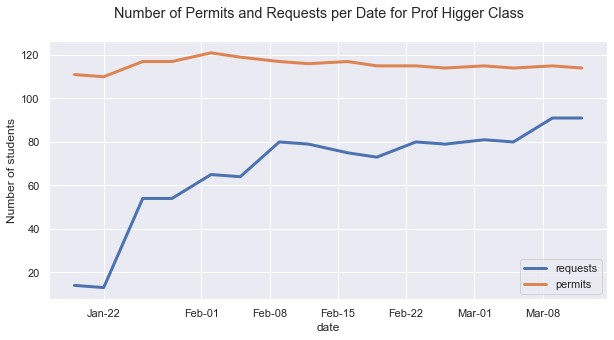

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# <your plotting functions here>

sns.set()
# adds values for EACH column in df
df_clean_sum = df_nuflex_clean.groupby('date').sum()
df_clean_sum.reset_index(inplace=True)
df_clean_sum

# plots the permits and requests
plt.plot(df_clean_sum['date'], df_clean_sum['permits'], linewidth=3.0)
plt.plot(df_clean_sum['date'], df_clean_sum['requests'], linewidth=3.0)    

# format x tick labels using strptime/strftime format string
my_fmt = mdates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_formatter(my_fmt)

# graph labeling
plt.xlabel('date')
plt.ylabel('Number of students')
plt.suptitle('Number of Permits and Requests per Date for Prof Higger Class')
plt.legend(['requests', 'permits'])
plt.gcf().set_size_inches(10, 4.75)